In [44]:
%%capture
import numpy as np
import pandas as pd
import ipywidgets
from src.preprocessing import ratings
from src.recommend import Recommender
import matplotlib.pyplot as plt

In [2]:
print("training phase")
recom = Recommender(ratings)
recom.fit(0.5)
print("end of training phase")

training phase
Computing the cosine similarity matrix...
Done computing similarity matrix.
end of training phase


How many books The users in the test data have read? \
We'll try to evaluate only those who have read more than 2 books. \
Here is a the answer for the above question by quantiles:

In [85]:
quantiles = np.linspace(0.1,0.9,num=9)
num_books = np.apply_along_axis(
    lambda q: recom.test_df.User.value_counts().quantile(q=q),
    axis=0, arr=quantiles)
out = pd.DataFrame(num_books, columns=['num_of_books_read'], index=quantiles)
out.index.name = "q"
out

,num_of_books_read
q,
0.1,1.0
0.2,1.0
0.3,1.0
0.4,1.0
0.5,1.0
0.6,2.0
0.7,2.0
0.8,4.0
0.9,9.0


In [95]:
test_users = recom.test_df.User.value_counts()[
    recom.test_df.User.value_counts() >=2].index.values

In [101]:
def eval_user(obj, uid):
    try:
        return obj.eval_rmse(uid)
    except:
        return None

In [152]:
np.random.seed(770)
sample_test_users = np.random.choice(test_users, size=100)

errors = np.zeros(100)
for i, user in enumerate(sample_test_users):
    try:
        errors[i] = (recom.eval_rmse(user))
    except:
        errors[i] = (np.nan)

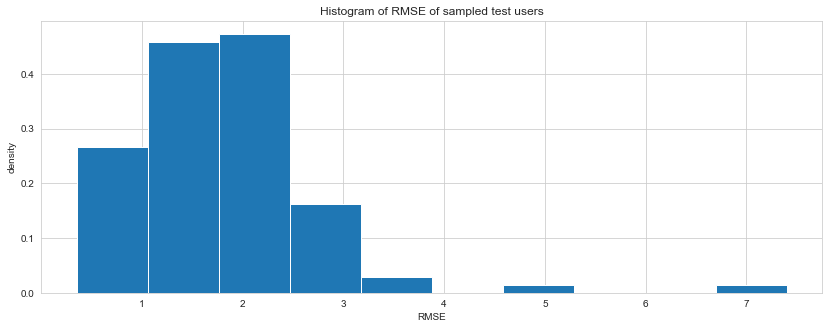

In [194]:
plt.figure(figsize=(14,5))
plt.hist(errors[~np.isnan(errors)], bins=10, density=True)
plt.title('Histogram of RMSE of sampled test users')
plt.xlabel("RMSE")
plt.ylabel("density")
plt.show()

In [178]:
data_to_plot = pd.DataFrame(
    np.column_stack((
        recom.test_df.User.value_counts()[sample_test_users].values[~np.isnan(errors)].astype(np.int),
        errors[~np.isnan(errors)]
    )),
columns=['num_of_books','rmse'], index=sample_test_users[~np.isnan(errors)])

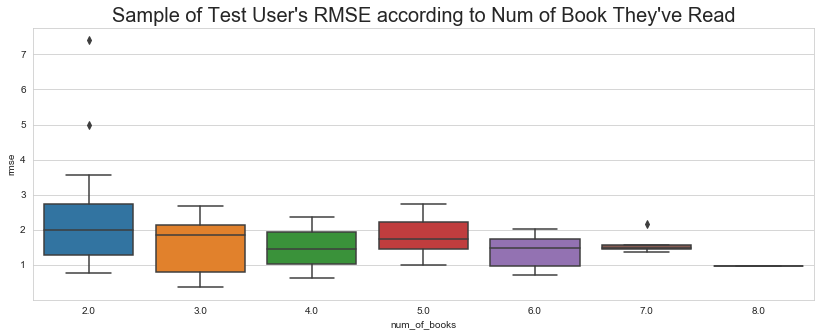

In [197]:
import seaborn as sns

plt.figure(figsize=(14,5))
ax = sns.boxplot(x="num_of_books", y="rmse",
data=data_to_plot.loc[data_to_plot['num_of_books']<10]).set_title(
    "Sample of Test User's RMSE according to Num of Book They've Read", size=20)